# Lecture 21 on Chi Square tests

\\(\chi^2\\) are used in two common ways:

1. dependency tests
2. goodness-of-fit tests

In the lecture I provided a couple of examples of each.

In [113]:
import pandas as pd
from IPython.display import display

# Replace 'path_to_file' with your actual file path
df = pd.read_csv('tripping_socks.csv')

# Now 'df' holds the DataFrame object of your CSV data
display(df)
#print(df)

,Sock Color,Tripped,Did Not Trip
0,Rainbow,10,150
1,Polka-dotted,20,230
2,Neon,15,165
3,Invisible,5,205


Assume we want the number of trips when wearing rainbow-colored socks.
The following won't work given the way we created the DataFrame above:

    rainbow_trips = df.loc["Rainbow", "Tripped"]
    display(tripped_rainbows)

It doesn't work because we have not specified that the sock colors
should be treated as row headings.  If we want them to treated as
row headings then we need to tell Pandas.  We can do this
at the time we load the DataFrame from the CSV file:

    df = pd.read_csv('tripping_socks.csv', index_col=0)

This specifies that column 0 should be used as the row headings.

In [115]:
df = pd.read_csv('tripping_socks.csv', index_col=0)
display(df)


,Tripped,Did Not Trip
Sock Color,,
Rainbow,10,150
Polka-dotted,20,230
Neon,15,165
Invisible,5,205


In [11]:
rainbow_trips = df.loc["Rainbow", "Tripped"]
print("number of trips when wearing rainbow-colored socks:", rainbow_trips)


number of trips when wearing rainbow-colored socks: 10


I can add a column to this dataframe, by adding existing columns:

    df['Total'] = df['Tripped'] + df['Did Not Trip']


In [117]:
df['Total'] = df['Tripped'] + df['Did Not Trip']
#df['Total'] = df.sums(index=1)
display(df)

,Tripped,Did Not Trip,Total
Sock Color,,,
Rainbow,10,150,160
Polka-dotted,20,230,250
Neon,15,165,180
Invisible,5,205,210


I can create a new row containing the totals using the sum() function which
sums all row values.

    df.loc['Total'] = column_sums

In [17]:
column_sums = df.sum()
df.loc['Total'] = column_sums
display(df)

,Tripped,Did Not Trip,Total
Sock Color,,,
Rainbow,10,150,160
Polka-dotted,20,230,250
Neon,15,165,180
Invisible,5,205,210
Total,50,750,800


In [28]:
from IPython.display import Markdown
total_trips = df.loc["Total", "Tripped"]
total = df.loc["Total", "Total"]

# total wearing rainbow colored
latex_frac = r"\frac{" + f"{total_trips}" + "}{" + f"{total}" + "}"
Markdown(r"fraction tripped = \\(\frac{\text{total tripped}}{\text{total}} = " +
         latex_frac + r"\\)")


fraction tripped = \\(\frac{\text{total tripped}}{\text{total}} = \frac{50}{800}\\)

In [118]:
total_rainbows = df.loc["Rainbow", "Total"]

Markdown(r"E[trips wearing rainbow] = total people wearing rainbow socks  \\(\cdot" + 
         latex_frac + f" = {total_rainbows * total_trips / total}" + r"\\)")

E[trips wearing rainbow] = total people wearing rainbow socks  \\(\cdot\frac{50}{800} = 10.0\\)

In [36]:
import pandas as pd

# Assuming df is your DataFrame after reading the CSV
df = pd.read_csv('tripping_socks.csv', index_col=0)

# Calculate row totals
df['Total'] = df.sum(axis=1)

# Calculate column totals
df.loc['Total'] = df.sum()

# Calculate expected counts for each cell
expected_counts = pd.DataFrame(columns=df.columns)
for row in df.index[:-1]:  # exclude the last row (total)
    for col in df.columns[:-1]:  # exclude the last column (total)
        expected_counts.at[row, col] = (df.at[row, 'Total'] * df.at['Total', col]) / df.at['Total', 'Total']

# Adding expected counts to the DataFrame
df_expected = df.copy()
for col in expected_counts.columns[:-1]:
    df_expected[col + ' (Expected)'] = expected_counts[col]

display(df_expected)


,Tripped,Did Not Trip,Total,Tripped (Expected),Did Not Trip (Expected)
Sock Color,,,,,
Rainbow,10,150,160,10.0,150.0
Polka-dotted,20,230,250,15.625,234.375
Neon,15,165,180,11.25,168.75
Invisible,5,205,210,13.125,196.875
Total,50,750,800,NaN,NaN


\\[\chi^2 = \sum \bigg( \frac{(O-E)^2}{E} \bigg)\\]

\\[\chi^2 = \frac{(10-10)^2}{10} + \frac{(150-150)^2}{150} + \frac{(20-15.62)^2}{15.62} + \cdots + \frac{(205-196.88)^2}{196.88}\\]

In [92]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('tripping_socks.csv', index_col=0)

# Calculate chi-squared test
chi2, p, dof, expected = chi2_contingency(df)

Markdown("Chi-squared Statistic: " + r"\\(\chi^2 = " + f"{chi2:.3}" + r"\\)")


Chi-squared Statistic: \\(\chi^2 = 8.01\\)

In [91]:
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=df.index, columns=df.columns))

P-value: 0.04590684708176705
Degrees of freedom: 3
Expected frequencies:
              Tripped  Did Not Trip
Sock Color                         
Rainbow        10.000       150.000
Polka-dotted   15.625       234.375
Neon           11.250       168.750
Invisible      13.125       196.875


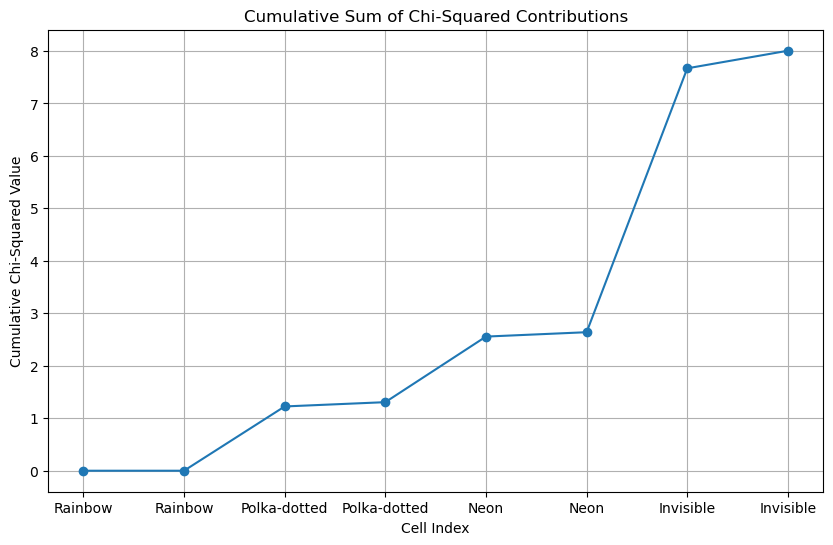

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Data from the previously discussed example
data = {
    'Tripped': [10, 20, 15, 5],
    'Did Not Trip': [150, 230, 165, 205]
}
df = pd.DataFrame(data, index=['Rainbow', 'Polka-dotted', 'Neon', 'Invisible'])

# Perform chi-squared test to get expected frequencies
chi2, p, dof, expected = chi2_contingency(df)

# Calculate individual chi-squared contributions for each cell
chi_squared_contributions = (df - expected) ** 2 / expected
cumulative_chi_squared = np.cumsum(chi_squared_contributions.to_numpy().ravel())

# Plot the cumulative sum of chi-squared contributions
plt.figure(figsize=(10, 6))
plt.plot(cumulative_chi_squared, marker='o', linestyle='-')
plt.title('Cumulative Sum of Chi-Squared Contributions')
plt.xlabel('Cell Index')
plt.ylabel('Cumulative Chi-Squared Value')
plt.grid(True)
plt.xticks(ticks=range(len(cumulative_chi_squared)), labels=[f"{index}" for index in chi_squared_contributions.index.repeat(2)])
plt.show()



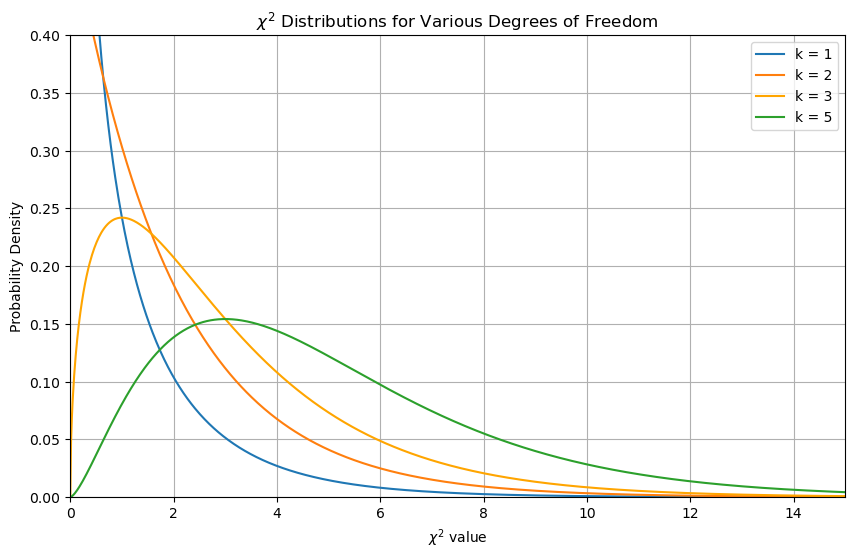

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define degrees of freedom to plot
degrees_of_freedom = [1, 2, 3, 5]

# Set up the x-axis for the plot (chi-squared values)
x = np.linspace(0, 15, 1000)

# Plot the chi-squared distribution for each degree of freedom
plt.figure(figsize=(10, 6))
for k in degrees_of_freedom:
    pdf = chi2.pdf(x, k)
    if k == 3:
        # Highlight k=3 with a different color and a thicker line
        plt.plot(x, pdf, label=f'k = {k}', color='orange')
    else:
        plt.plot(x, pdf, label=f'k = {k}')


plt.ylim(0, 0.4)
plt.xlim(0, 15)

plt.title('$\chi^2$ Distributions for Various Degrees of Freedom')
plt.xlabel('$\chi^2$ value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



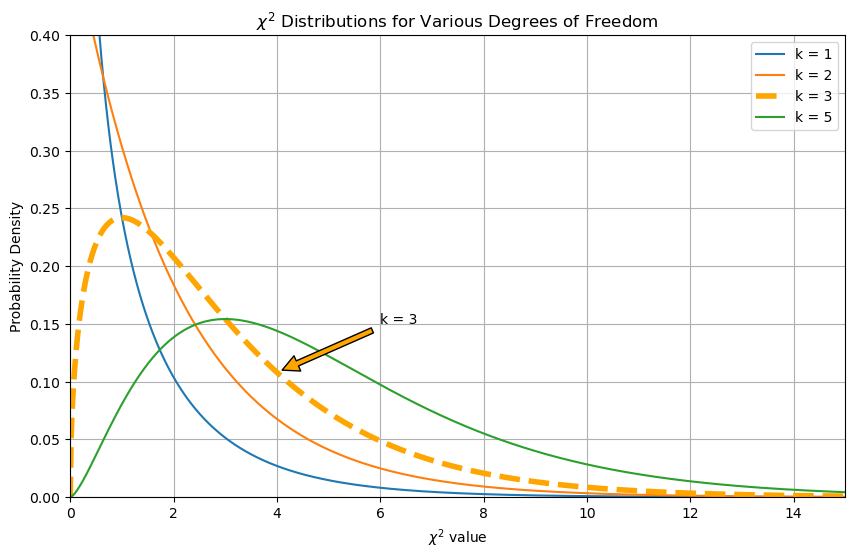

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define degrees of freedom to plot
degrees_of_freedom = [1, 2, 3, 5]

# Set up the x-axis for the plot (chi-squared values)
x = np.linspace(0, 15, 1000)

# Plot the chi-squared distribution for each degree of freedom
plt.figure(figsize=(10, 6))
for k in degrees_of_freedom:
    # Get the probability density function for chi-squared with k degrees of freedom
    pdf = chi2.pdf(x, k)
    if k == 3:
        # Highlight k=3 with a different color and a thicker line
        plt.plot(x, pdf, label=f'k = {k}', color='orange', linewidth=4, linestyle='--')
        # Adding annotation
        plt.annotate(f'k = {k}', xy=(4, chi2.pdf(4, k)), xytext=(6, 0.15),
                     arrowprops=dict(facecolor='orange', shrink=0.05))
    else:
        plt.plot(x, pdf, label=f'k = {k}')

plt.ylim(0, 0.4)
plt.xlim(0, 15)

plt.title('$\chi^2$ Distributions for Various Degrees of Freedom')
plt.xlabel('$\chi^2$ value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



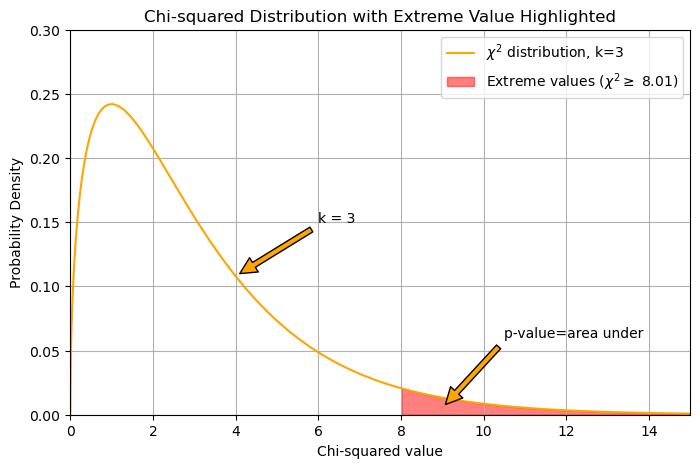

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('tripping_socks.csv', index_col=0)

# Calculate chi-squared test
chi_squared_stat, p, dof, expected = chi2_contingency(df)

k = dof

# Set up the x-axis for the plot (chi-squared values)
x = np.linspace(0, 15, 1000)
y = chi2.pdf(x, k)

# Plot the chi-squared distribution for k=3
plt.figure(figsize=(8, 5))
plt.plot(x, y, color="orange", label='$\chi^2$ distribution, k=3')
plt.annotate(f'k = {k}', xy=(4, chi2.pdf(4, k)), xytext=(6, 0.15),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(f'p-value=area under', xy=(9, chi2.pdf(9, k)-0.008), xytext=(10.5, 0.06),
             arrowprops=dict(facecolor='orange', shrink=0.05))

# Fill the area under the curve where the chi-squared value is as extreme or more extreme than observed
extreme_x = x[x >= chi_squared_stat]
extreme_y = y[x >= chi_squared_stat]
plt.fill_between(extreme_x, extreme_y, color='red', alpha=0.5, 
                 label=f'Extreme values ($\chi^2 \geq$ {chi_squared_stat:.3})')

plt.ylim(0, 0.3)
plt.xlim(0, 15)

plt.title('Chi-squared Distribution with Extreme Value Highlighted')
plt.xlabel('Chi-squared value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## Goodness-of-fit example using Zample 

\\[\chi^2(k) = \chi^2(2)\\]

In [95]:
from scipy.stats import chisquare

# Observed and expected counts
observed = [50, 90, 160]
expected = [45, 90, 165]

# Perform chi-squared test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

Markdown("Chi-squared Statistic: " + r"\\(\chi^2 = " + f"{chi2_stat:.3}" + r"\\)")

Chi-squared Statistic: \\(\chi^2 = 0.707\\)

In [97]:
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-squared Statistic: 0.7070707070707071
P-value: 0.7022011668554531


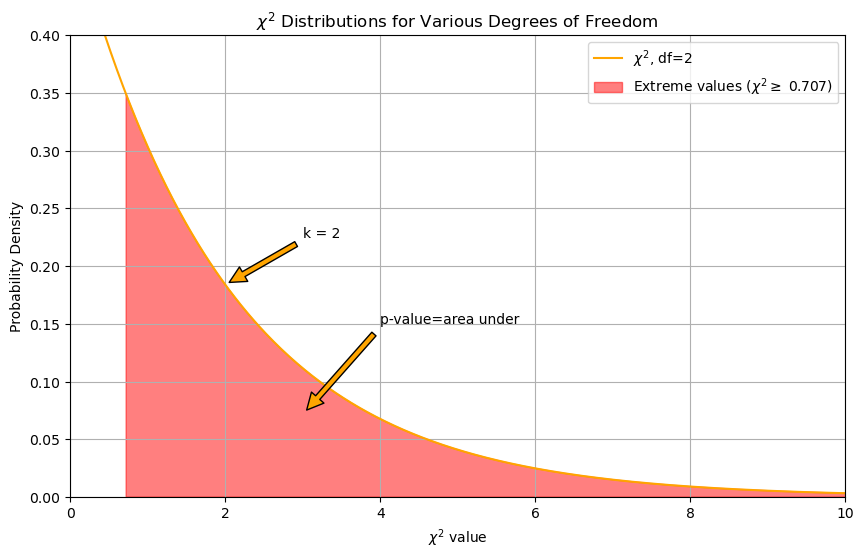

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Data from Zample example with degrees of freedom and observed chi-squared statistic
k = degrees_of_freedom = 2

# Set up the x-axis for the plot (chi-squared values)
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, degrees_of_freedom)

# Plot the chi-squared distribution for k=2
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='orange', label='$\chi^2$, df=2')
plt.annotate(f'k = {k}', xy=(2, chi2.pdf(2, k)), xytext=(3, 0.225),
            arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(f'p-value=area under', xy=(3, chi2.pdf(3, k)-0.04), xytext=(4, 0.15),
             arrowprops=dict(facecolor='orange', shrink=0.05))

# Fill the area under the curve where the chi-squared value is as extreme or more extreme than observed
extreme_x = x[x >= chi2_stat]
extreme_y = y[x >= chi2_stat]
plt.fill_between(extreme_x, extreme_y, color='red', alpha=0.5, label=f'Extreme values ($\chi^2 \geq$ {chi2_stat:.3})')

plt.ylim(0, 0.4)
plt.xlim(0, 10)

plt.title('$\chi^2$ Distributions for Various Degrees of Freedom')
plt.xlabel('$\chi^2$ value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
